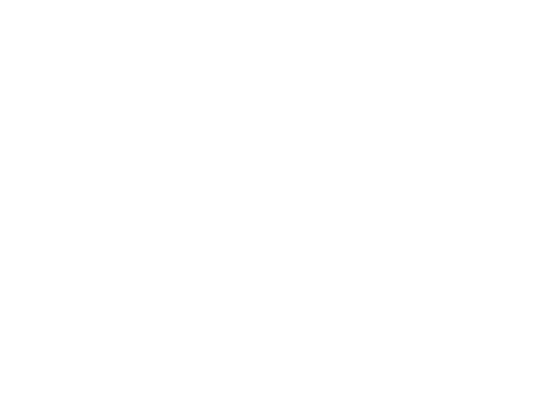

In [2]:
img = double(imread('stones_rgb.jpg'));
imshow(img)

In [3]:
X = reshape(img,[],3);
[n,c_size] = size(X);

In [4]:
W = zeros(n,n);

In [5]:
%% Constructing W

lamda = [0.299 0.587 0.114 ; -0.14713 0.28886 0.436 ; 0.615 -0.51499 -0.10001];
sigma = 10;
t = 10*10*2;
for i=1:64
    for j=1:64
        for k = i-2:i+2
            if k > 0 && k < 65
                for h = j-2:j+2 
                    if h >0 && h < 65
                        i_1 = i + 64*(j-1);
                        i_2 = k + 64*(h-1);
                        if i_1 != i_2
                            dif = img(i,j) - img(k,h);
                            e_d = norm(lamda*dif',2);
                            W(i_1,i_2) = exp(-1 * e_d/t); 
                        end
                    end
                end
            end
        end
    end
end

In [6]:
sqrt_inv_D = zeros(n,n);
for i=1:n
    sqrt_inv_D(i,i) = 1/sqrt(sum(W(i,:)));
end

In [7]:
%% D^1/2
L = sqrt_inv_D * W * sqrt_inv_D;

In [8]:
%% eigenvalue and eigen value finding with simulatenous iteration
k = 5;
[Q , R] = qr(randn(n,n));
Q = Q(:,1:k);
for i = 1:5000
    Z = L * Q;
    [Q,R] = qr(Z,0);
end
V = sqrt_inv_D * Q;


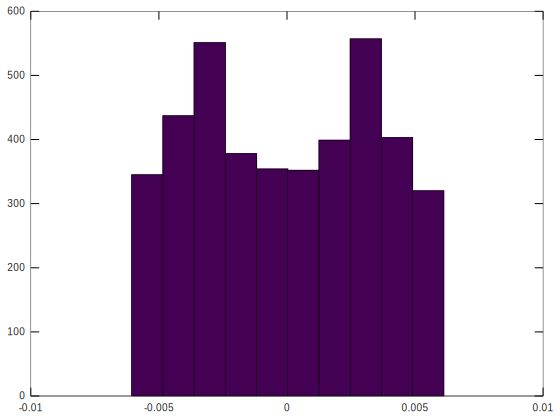

In [18]:
hist(V(:,1))
hist(V(:,2))
image = imread('stones_rgb.jpg');
im1 = reshape(V(:,2),64,64);
for i=1:64
    for j=1:64
        %if im1(i,j) < 0
            image(i,j,1) = 0;
            image(i,j,2) = 0;
            image(i,j,3) = 0;
        %end
    end
end


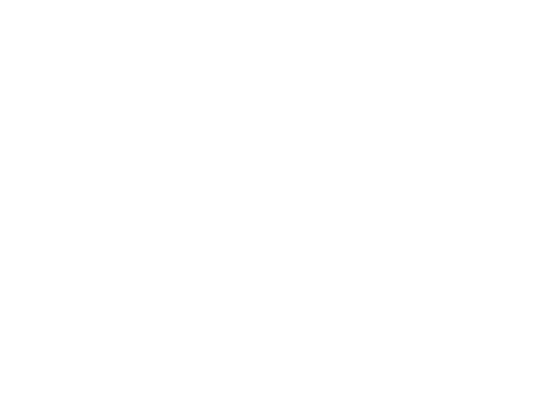

In [14]:
imshow(uint8(image));

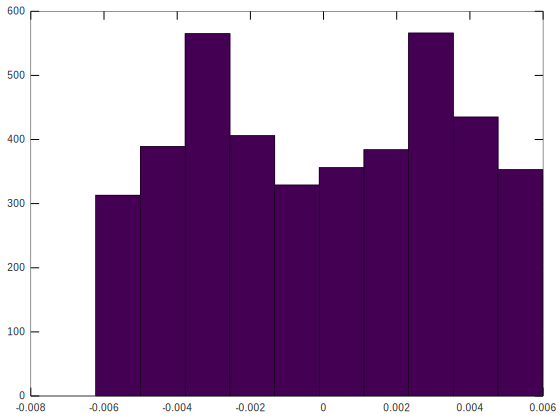

In [19]:
hist(V(:,3))

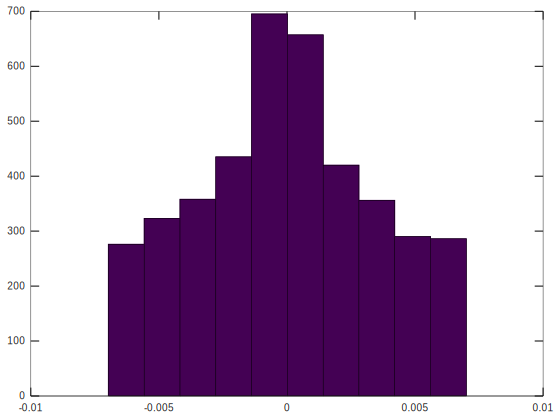

In [20]:
hist(V(:,4))

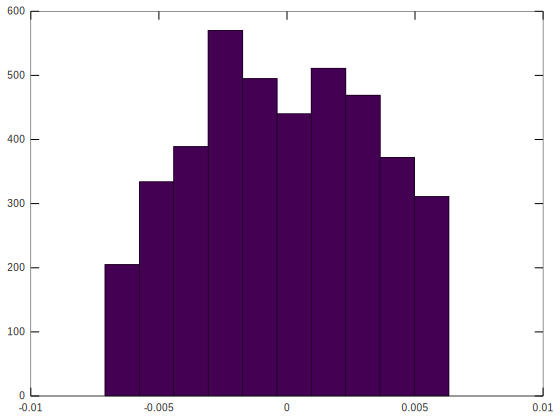

In [21]:
hist(V(:,5))